## Pandas plotting functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader

In [3]:
pandas_datareader.__version__

'0.10.0'

In [4]:
import yfinance as yf

In [5]:
yf.pdr_override()

In [6]:
# formatting options

In [7]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 120)

In [8]:
# Download daily data

In [9]:
start_date = '2007-01-03'
end_date = '2014-05-16'

In [10]:
tickers = ['AAPL']
df_apple = pandas_datareader.data.get_data_yahoo(tickers,
                                                 start_date,end_date,
                                                 interval='1d')
df_apple[:5]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,3.081786,3.092143,2.925000,2.992857,2.543757,1238319600
2007-01-04,3.001786,3.069643,2.993571,3.059286,2.600218,847260400
2007-01-05,3.063214,3.078571,3.014286,3.037500,2.581701,834741600
2007-01-08,3.070000,3.090357,3.045714,3.052500,2.594450,797106800
2007-01-09,3.087500,3.320714,3.041071,3.306071,2.809971,3349298400


In [11]:
df_apple['Adj Close'].head()

Date
2007-01-03    2.543757
2007-01-04    2.600218
2007-01-05    2.581701
2007-01-08    2.594450
2007-01-09    2.809971
Name: Adj Close, dtype: float64

In [12]:
apple_px = df_apple['Adj Close']
apple_vol = df_apple['Volume']

In [13]:
tickers = ['AAPL', 'CVX', 'IBM', 'XOM', 'GS', 'BA', 'TEVA', 'CME']
df = pandas_datareader.data.get_data_yahoo(tickers,start_date,
                                      end_date,interval='1d')
df.shape

[*********************100%***********************]  8 of 8 completed


(1856, 48)

In [14]:
df[:5]

Adj Close                                                          ...     Volume                         \
                AAPL         BA        CME        CVX          GS        IBM  ...        CME         CVX         GS   
Date                                                                          ...                                     
2007-01-03  2.543757  64.405685  58.447350  37.850384  156.601578  55.299988  ...  3981500.0  12719600.0  6494900.0   
2007-01-04  2.600218  64.665741  58.872013  37.482388  155.142639  55.891247  ...  2590000.0  10825300.0  6460200.0   
2007-01-05  2.581701  64.391289  59.148060  37.626389  155.298630  55.385262  ...  2196500.0   9618000.0  5892900.0   
2007-01-08  2.594450  64.239632  59.777241  38.106380  158.949982  56.226669  ...  2040000.0   9435100.0  7851000.0   
2007-01-09  2.809970  63.560665  60.122540  37.669060  159.223007  56.891827  ...  2144500.0  10500000.0  7147100.0   

                                                
                   IBM        TEVA         XOM  
Date                                            
2007-01-03   9619853.0   8448200.0  30510700.0  
2007-01-04  11008627.0  11538700.0  31046600.0  
2007-01-05   7553480.0   9297600.0  24671500.0  
2007-01-08  10815640.0  10213600.0  25981900.0  
2007-01-09  11619177.0   8120300.0  27039900.0  

[5 rows x 48 columns]

In [15]:
df[-5:]

Adj Close                                                            ...     Volume                        \
                 AAPL          BA        CME        CVX          GS         IBM  ...        CME        CVX         GS   
Date                                                                             ...                                    
2014-05-12  18.827282  114.608147  49.378326  84.719307  135.039459  125.178246  ...  1314700.0  4914700.0  2256100.0   
2014-05-13  18.856813  115.342773  49.155483  85.131958  135.657349  124.931198  ...   812700.0  4415200.0  1901500.0   
2014-05-14  18.860310  114.945213  48.612309  85.517555  134.954849  122.675545  ...  1120400.0  4961400.0  2128700.0   
2014-05-15  18.699928  113.406708  48.382523  84.466911  132.576538  121.206482  ...  1443800.0  5939500.0  2769300.0   
2014-05-16        NaN         NaN        NaN        NaN         NaN         NaN  ...        NaN        NaN        NaN   

                                              
                  IBM       TEVA         XOM  
Date                                          
2014-05-12  3951160.0  3671600.0   8830500.0  
2014-05-13  2329024.0  4501400.0   7528800.0  
2014-05-14  5493069.0  4867600.0   6999200.0  
2014-05-15  4395501.0  4025200.0  13658700.0  
2014-05-16        NaN        NaN         NaN  

[5 rows x 48 columns]

In [16]:
pd.Index(df.index)

DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08', '2007-01-09', '2007-01-10', '2007-01-11',
               '2007-01-12', '2007-01-16', '2007-01-17',
               ...
               '2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-12', '2014-05-13',
               '2014-05-14', '2014-05-15', '2014-05-16'],
              dtype='datetime64[ns]', name='Date', length=1856, freq=None)

In [17]:
df.drop(pd.to_datetime('2014-05-16'),inplace = True)
df

Adj Close                                                            ...     Volume              \
                 AAPL          BA        CME        CVX          GS         IBM  ...        CME         CVX   
Date                                                                             ...                          
2007-01-03   2.543757   64.405685  58.447350  37.850384  156.601578   55.299988  ...  3981500.0  12719600.0   
2007-01-04   2.600218   64.665741  58.872013  37.482388  155.142639   55.891247  ...  2590000.0  10825300.0   
2007-01-05   2.581701   64.391289  59.148060  37.626389  155.298630   55.385262  ...  2196500.0   9618000.0   
2007-01-08   2.594450   64.239632  59.777241  38.106380  158.949982   56.226669  ...  2040000.0   9435100.0   
2007-01-09   2.809970   63.560665  60.122540  37.669060  159.223007   56.891827  ...  2144500.0  10500000.0   
...               ...         ...        ...        ...         ...         ...  ...        ...         ...   
2014-05-09  18.595768  113.311653  48.459141  84.577263  133.050491  123.559639  ...  1407200.0   4826100.0   
2014-05-12  18.827282  114.608147  49.378326  84.719307  135.039459  125.178246  ...  1314700.0   4914700.0   
2014-05-13  18.856813  115.342773  49.155483  85.131958  135.657349  124.931198  ...   812700.0   4415200.0   
2014-05-14  18.860310  114.945213  48.612309  85.517555  134.954849  122.675545  ...  1120400.0   4961400.0   
2014-05-15  18.699928  113.406708  48.382523  84.466911  132.576538  121.206482  ...  1443800.0   5939500.0   

                                                           
                   GS         IBM        TEVA         XOM  
Date                                                       
2007-01-03  6494900.0   9619853.0   8448200.0  30510700.0  
2007-01-04  6460200.0  11008627.0  11538700.0  31046600.0  
2007-01-05  5892900.0   7553480.0   9297600.0  24671500.0  
2007-01-08  7851000.0  10815640.0  10213600.0  25981900.0  
2007-01-09  7147100.0  11619177.0   8120300.0  27039900.0  
...               ...         ...         ...         ...  
2014-05-09  2637000.0   2365634.0   4256600.0   8948800.0  
2014-05-12  2256100.0   3951160.0   3671600.0   8830500.0  
2014-05-13  1901500.0   2329024.0   4501400.0   7528800.0  
2014-05-14  2128700.0   5493069.0   4867600.0   6999200.0  
2014-05-15  2769300.0   4395501.0   4025200.0  13658700.0  

[1855 rows x 48 columns]

In [18]:
close_px = df['Adj Close']
close_px

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-03,2.543757,64.405685,58.447350,37.850384,156.601578,55.299988,24.707596,41.750305
2007-01-04,2.600218,64.665741,58.872013,37.482388,155.142639,55.891247,25.007944,40.967232
2007-01-05,2.581701,64.391289,59.148060,37.626389,155.298630,55.385262,25.458467,41.260166
2007-01-08,2.594450,64.239632,59.777241,38.106380,158.949982,56.226669,25.988033,40.927807
2007-01-09,2.809970,63.560665,60.122540,37.669060,159.223007,56.891827,25.940607,40.612320
...,...,...,...,...,...,...,...,...
2014-05-09,18.595768,113.311653,48.459141,84.577263,133.050491,123.559639,44.431602,68.404541
2014-05-12,18.827282,114.608147,49.378326,84.719307,135.039459,125.178246,45.099209,68.592407
2014-05-13,18.856813,115.342773,49.155483,85.131958,135.657349,124.931198,46.190823,68.679619


In [19]:
# most profitable stock

In [20]:
ratios = close_px.iloc[-1] / close_px.iloc[0]
ratios

AAPL    7.351302
BA      1.760818
CME     0.827797
CVX     2.231600
GS      0.846585
IBM     2.191799
TEVA    1.828239
XOM     1.619617
dtype: float64

In [21]:
# AAPL is most profitable stock

# Plotting time-series

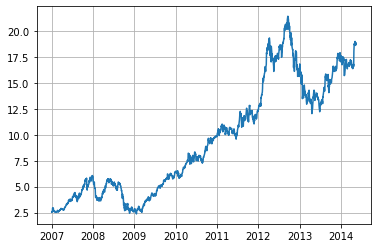

In [22]:
# matplotlib to plot AAPL closing prices
plt.figure()
plt.plot(close_px.AAPL)
plt.grid();

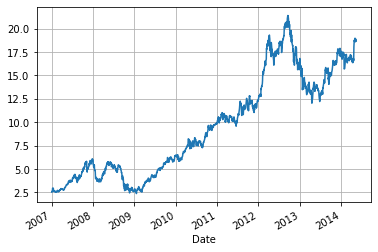

In [23]:
# pandas to plot AAPL closing prices
close_px['AAPL'].plot(grid=True);

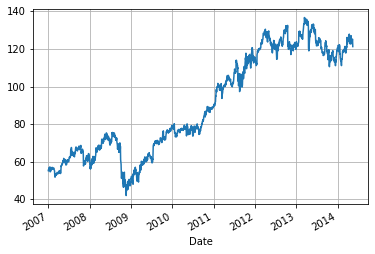

In [24]:
# plot closing prices of IBM
close_px['IBM'].plot(grid=True);

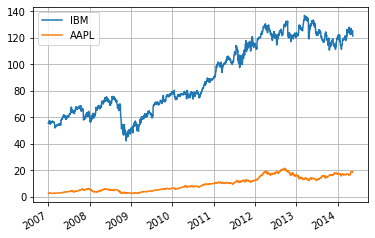

In [25]:
# Compare IBM, AAPL on the same chart
close_px[['IBM', 'AAPL']].plot(grid=True)
plt.xlabel('');

In [26]:
df2 = close_px[['IBM', 'AAPL']]
df2[:5]

,IBM,AAPL
Date,,
2007-01-03,55.299988,2.543757
2007-01-04,55.891247,2.600218
2007-01-05,55.385262,2.581701
2007-01-08,56.226669,2.594450
2007-01-09,56.891827,2.809970


In [27]:
df2.shift(1)

,IBM,AAPL
Date,,
2007-01-03,NaN,NaN
2007-01-04,55.299988,2.543757
2007-01-05,55.891247,2.600218
2007-01-08,55.385262,2.581701
2007-01-09,56.226669,2.594450
...,...,...
2014-05-09,122.799103,18.673569
2014-05-12,123.559639,18.595768
2014-05-13,125.178246,18.827282


In [28]:
# One-dollar investment comparison

In [29]:
gross_returns = df2 / df2.shift(1)
gross_returns

,IBM,AAPL
Date,,
2007-01-03,NaN,NaN
2007-01-04,1.010692,1.022196
2007-01-05,0.990947,0.992879
2007-01-08,1.015192,1.004939
2007-01-09,1.011830,1.083069
...,...,...
2014-05-09,1.006193,0.995834
2014-05-12,1.013100,1.012450
2014-05-13,0.998026,1.001569


In [30]:
cum_gross_returns = gross_returns.cumprod()
cum_gross_returns[:5]

,IBM,AAPL
Date,,
2007-01-03,NaN,NaN
2007-01-04,1.010692,1.022196
2007-01-05,1.001542,1.014916
2007-01-08,1.016757,1.019928
2007-01-09,1.028786,1.104653


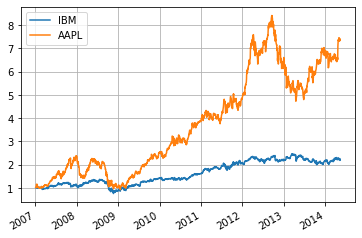

In [31]:
cum_gross_returns.plot(grid=True)
plt.xlabel('')
plt.legend(loc='upper left');

In [32]:
# plot all stock prices

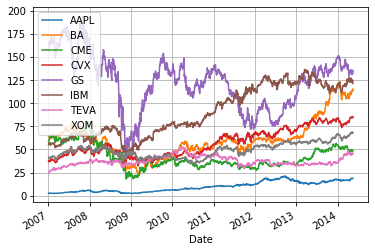

In [33]:
close_px.plot(grid=True);

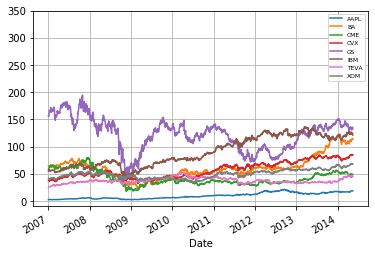

In [34]:
# plot all prices adjusting the legend
close_px.plot(grid=True)
plt.ylim(-10,350)
plt.legend(loc=1, prop={'size': 6});

In [35]:
# starting prices (2007) are different

In [36]:
apple_px = df_apple['Adj Close']
apple_vol = df_apple['Volume']

### Net changes

In [37]:
net_returns = close_px / close_px.shift(1) - 1
net_returns[:9]

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,0.004038,0.007266,-0.009722,-0.009316,0.010692,0.012156,-0.018756
2007-01-05,-0.007121,-0.004244,0.004689,0.003842,0.001005,-0.009053,0.018015,0.007150
2007-01-08,0.004939,-0.002355,0.010637,0.012757,0.023512,0.015192,0.020801,-0.008055
2007-01-09,0.083069,-0.010569,0.005776,-0.011476,0.001718,0.011830,-0.001825,-0.007708
2007-01-10,0.047857,0.014431,0.028588,-0.017273,0.019747,-0.011791,0.002133,-0.015258
2007-01-11,-0.012372,-0.004817,0.005964,-0.010373,0.018116,-0.002427,-0.007905,-0.000141
2007-01-12,-0.012317,-0.007992,0.031132,0.024167,0.009958,0.006994,0.003065,0.023668
2007-01-16,0.026210,-0.001475,-0.007404,-0.009666,-0.001869,0.014899,0.005194,-0.014175


In [38]:
# AAPL Jan 4th price is 1.228% larger than Jan 3rd price

In [39]:
x = net_returns["AAPL"]
x.head()

Date
2007-01-03         NaN
2007-01-04    0.022196
2007-01-05   -0.007121
2007-01-08    0.004939
2007-01-09    0.083069
Name: AAPL, dtype: float64

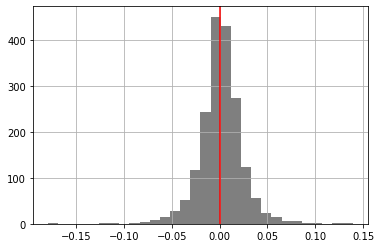

In [40]:
# histogram of net returns
x.hist(color = 'k',bins=30,alpha=0.5,grid=True)
plt.axvline(linewidth=1.5,color='r');

In [41]:
# Risk of stocks - std. deviation of net returns
net_returns.std()

AAPL    0.022426
BA      0.019597
CME     0.027342
CVX     0.018287
GS      0.028445
IBM     0.014748
TEVA    0.015723
XOM     0.016946
dtype: float64

In [42]:
# Most risky are GS and CME
# Least risky IBM, TEVA

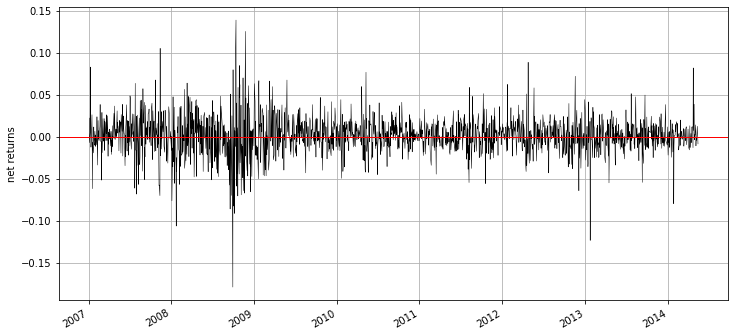

In [43]:
# plot net returns
net_returns["AAPL"].plot(figsize = (12,6),grid=True,
                         color = 'k',linewidth = 0.5)
# add line at y=0
plt.axhline(linewidth=1, color='r')
plt.xlabel('')
plt.ylabel('net returns');

In [44]:
# Add histogram on one side

In [45]:
from matplotlib.gridspec import GridSpec

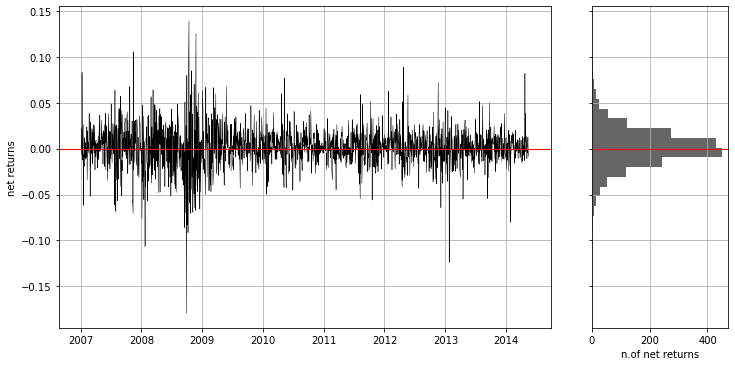

In [46]:
fig = plt.figure(figsize = (12,8))
gs = plt.GridSpec(4,4,wspace=0.3)

left_plot = fig.add_subplot(gs[1:4,0:3])
right_plot = fig.add_subplot(gs[1:4,3])

left_plot.plot(x,color = 'k',linewidth = 0.5)
left_plot.axhline(linewidth=1, color='r')
left_plot.grid()
left_plot.set_xlabel('')
left_plot.set_ylabel('net returns')

right_plot.hist(x,color = 'k',bins = 30,alpha = 0.6,
                orientation="horizontal")
right_plot.axhline(linewidth=1, color='r')
right_plot.grid()

right_plot.set_xlabel('n.of net returns')
# Turn off tick labels on histogram
plt.setp(right_plot.get_yticklabels(), visible=False);

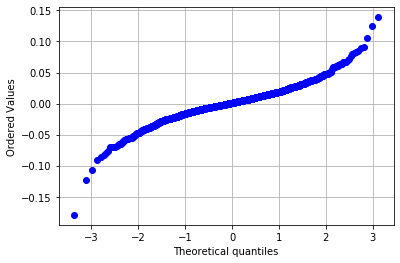

In [47]:
import scipy.stats as stats
stats.probplot(x, dist="norm", plot=plt)
plt.title('')
plt.grid();

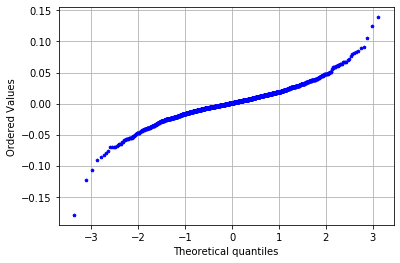

In [48]:
# change marker
fig = plt.figure()   
ax = fig.add_subplot(111)
stats.probplot(x,plot=plt)
plt.title('')
plt.grid()
# change marker size
ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_markersize(3)

### Gross changes (and cumulative gross returns)

In [49]:
gross_returns = close_px / close_px.shift(1)
gross_returns

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,1.022196,1.004038,1.007266,0.990278,0.990684,1.010692,1.012156,0.981244
2007-01-05,0.992879,0.995756,1.004689,1.003842,1.001005,0.990947,1.018015,1.007150
2007-01-08,1.004939,0.997645,1.010637,1.012757,1.023512,1.015192,1.020801,0.991945
2007-01-09,1.083069,0.989431,1.005776,0.988524,1.001718,1.011830,0.998175,0.992292
...,...,...,...,...,...,...,...,...
2014-05-09,0.995834,1.004059,1.006072,0.999521,0.998729,1.006193,0.985000,1.003149
2014-05-12,1.012450,1.011442,1.018968,1.001679,1.014949,1.013100,1.015025,1.002746
2014-05-13,1.001569,1.006410,0.995487,1.004871,1.004576,0.998026,1.024205,1.001271


In [50]:
# cumulative sums

In [51]:
gross_returns.cumsum()

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,1.022196,1.004038,1.007266,0.990278,0.990684,1.010692,1.012156,0.981244
2007-01-05,2.015074,1.999794,2.011955,1.994119,1.991689,2.001639,2.030171,1.988394
2007-01-08,3.020013,2.997438,3.022592,3.006876,3.015201,3.016831,3.050972,2.980339
2007-01-09,4.103082,3.986869,4.028368,3.995400,4.016919,4.028661,4.049148,3.972631
...,...,...,...,...,...,...,...,...
2014-05-09,1852.457940,1850.919639,1850.506500,1851.112427,1850.577552,1851.005128,1850.815992,1850.758755
2014-05-12,1853.470390,1851.931081,1851.525468,1852.114107,1851.592501,1852.018227,1851.831018,1851.761501
2014-05-13,1854.471958,1852.937491,1852.520955,1853.118977,1852.597077,1853.016254,1852.855223,1852.762773


In [52]:
# cumulative products

In [53]:
gross_returns.cumprod()

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,1.022196,1.004038,1.007266,0.990278,0.990684,1.010692,1.012156,0.981244
2007-01-05,1.014916,0.999776,1.011989,0.994082,0.991680,1.001542,1.030390,0.988260
2007-01-08,1.019928,0.997422,1.022754,1.006763,1.014996,1.016757,1.051824,0.980300
2007-01-09,1.104653,0.986880,1.028662,0.995209,1.016739,1.028786,1.049904,0.972743
...,...,...,...,...,...,...,...,...
2014-05-09,7.310354,1.759342,0.829108,2.234515,0.849611,2.234352,1.798297,1.638420
2014-05-12,7.401367,1.779473,0.844834,2.238268,0.862312,2.263622,1.825318,1.642920
2014-05-13,7.412976,1.790879,0.841022,2.249170,0.866258,2.259154,1.869499,1.645009


In [54]:
# one dollar in Jan 3rd becomes 1.022196 dollars in Jan 4th
# one dollar in Jan 3rd becomes 1.014917 dollars in Jan 5th

In [55]:
# give name to this dataframe
cum_gross_returns = gross_returns.cumprod()

In [56]:
ratios = close_px.iloc[-1]\
            / close_px.iloc[0]
ratios

AAPL    7.351302
BA      1.760818
CME     0.827797
CVX     2.231600
GS      0.846585
IBM     2.191799
TEVA    1.828239
XOM     1.619617
dtype: float64

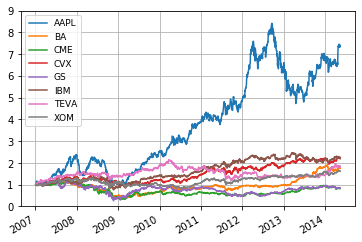

In [57]:
# plot cumulative gross returns
cum_gross_returns.plot(grid=True)
plt.ylim(0,9)
plt.xlabel('')
plt.legend(prop={'size': 9});

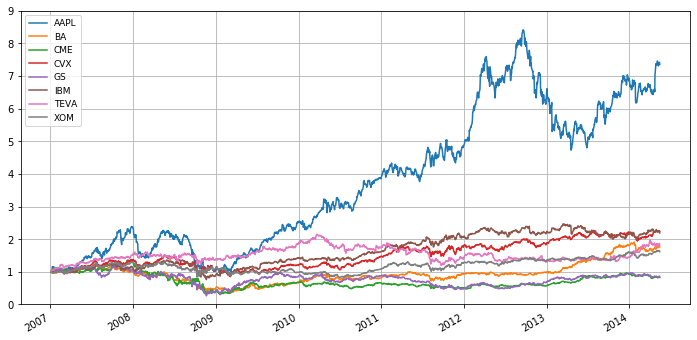

In [58]:
# plot cumulative gross returns
cum_gross_returns.plot(figsize=(12,6),grid=True)
plt.ylim(0,9)
plt.xlabel('')
plt.legend(prop={'size': 9});

In [59]:
# All curves with the same starting point (useful for comparison)

# monthly data

In [60]:
# end-of-day closing prices

In [61]:
close_px.loc['2007-01-04':'2007-01-11']

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-04,2.600218,64.665741,58.872013,37.482388,155.142639,55.891247,25.007944,40.967232
2007-01-05,2.581701,64.391289,59.148060,37.626389,155.298630,55.385262,25.458467,41.260166
2007-01-08,2.594450,64.239632,59.777241,38.106380,158.949982,56.226669,25.988033,40.927807
2007-01-09,2.809970,63.560665,60.122540,37.669060,159.223007,56.891827,25.940607,40.612320
2007-01-10,2.944445,64.477936,61.841293,37.018398,162.367172,56.220993,25.995934,39.992638
2007-01-11,2.908018,64.167374,62.210094,36.634392,165.308609,56.084545,25.790438,39.987007


In [62]:
# end-of-month prices

In [63]:
monthly = close_px.asfreq('BM')
monthly.loc['2010']

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2010-01-29,5.830000,47.221775,33.719635,42.324692,119.269791,73.228355,46.351242,38.498722
2010-02-26,6.211260,49.552635,35.467815,42.836422,125.670074,76.422661,49.199821,39.092697
2010-03-31,7.133447,56.966690,37.301411,44.927883,137.147949,77.077736,51.716805,40.283527
2010-04-30,7.925413,56.825462,38.854305,48.251698,116.707954,77.528450,48.150394,40.758656
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2010-08-31,7.379325,48.531433,29.396065,44.715157,110.613007,74.748489,41.792625,36.047840
2010-09-30,8.613258,52.826454,30.989786,48.922283,116.792747,81.432335,43.551186,37.682228
2010-10-29,9.136277,56.081463,34.464165,49.857880,130.161987,87.175201,42.832912,40.548485


In [64]:
close_px.loc['2010-05-28':'2010-06-11']

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2010-05-28,7.797618,50.645103,37.365124,44.175270,116.242401,75.666634,45.092506,36.609165
2010-06-01,7.917520,49.674507,36.772766,43.230415,114.308540,75.110878,44.154793,35.876495
2010-06-02,8.012227,50.771362,38.104992,44.330753,116.701714,76.965378,44.648331,36.796871
2010-06-03,7.987031,50.747673,38.172249,44.199188,116.065125,77.297630,45.051392,37.275223
2010-06-04,7.769688,48.254086,36.655937,42.626411,114.622780,75.678711,43.850456,36.046040
2010-06-07,7.617310,47.433430,35.348465,42.668285,111.746117,74.984009,42.838707,35.906773
2010-06-08,7.568437,48.151512,35.312946,42.470940,111.020966,74.736336,42.172436,37.081463
2010-06-09,7.382359,48.696003,34.526402,42.333401,110.231262,74.845047,42.197113,36.348801
2010-06-10,7.604254,50.416248,35.962090,44.354671,107.789764,77.128471,43.299335,37.475033


In [65]:
# forward fill values

In [66]:
monthly = close_px.asfreq('d').interpolate().asfreq('BM')
monthly.loc['2010']

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2010-01-29,5.830000,47.221775,33.719635,42.324692,119.269791,73.228355,46.351242,38.498722
2010-02-26,6.211260,49.552635,35.467815,42.836422,125.670074,76.422661,49.199821,39.092697
2010-03-31,7.133447,56.966690,37.301411,44.927883,137.147949,77.077736,51.716805,40.283527
2010-04-30,7.925413,56.825462,38.854305,48.251698,116.707954,77.528450,48.150394,40.758656
2010-05-31,7.887544,49.917156,36.920856,43.466629,114.792006,75.249817,44.389221,36.059663
...,...,...,...,...,...,...,...,...
2010-08-31,7.379325,48.531433,29.396065,44.715157,110.613007,74.748489,41.792625,36.047840
2010-09-30,8.613258,52.826454,30.989786,48.922283,116.792747,81.432335,43.551186,37.682228
2010-10-29,9.136277,56.081463,34.464165,49.857880,130.161987,87.175201,42.832912,40.548485


In [67]:
#monthly = close_px.asfreq('BM').ffill()
#monthly['2010']

In [68]:
# monthly net changes

In [69]:
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:8]

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,-0.013065,-0.021918,-0.042872,-0.053063,-0.049067,-0.059808,0.015658,-0.028539
2007-03-30,0.098098,0.018909,-0.010902,0.079392,0.024188,0.014203,0.052587,0.052595
2007-04-30,0.074158,0.046001,-0.029505,0.051785,0.059669,0.084341,0.023511,0.052088
2007-05-31,0.214328,0.085646,0.027576,0.055145,0.055853,0.047011,0.025849,0.052268
2007-06-29,0.007014,-0.044040,0.007935,0.033746,-0.060957,-0.012664,0.052296,0.008537
2007-07-31,0.079646,0.075603,0.033947,0.012108,-0.129512,0.051306,0.018667,0.014902
2007-08-31,0.051002,-0.061887,0.004163,0.036614,-0.065466,0.058315,0.025514,0.011074


In [70]:
# substitute first row with zeros

In [71]:
monthly_pc[:1] = 0.0
monthly_pc[:5]

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-28,-0.013065,-0.021918,-0.042872,-0.053063,-0.049067,-0.059808,0.015658,-0.028539
2007-03-30,0.098098,0.018909,-0.010902,0.079392,0.024188,0.014203,0.052587,0.052595
2007-04-30,0.074158,0.046001,-0.029505,0.051785,0.059669,0.084341,0.023511,0.052088
2007-05-31,0.214328,0.085646,0.027576,0.055145,0.055853,0.047011,0.025849,0.052268


In [72]:
# monthly cumulative returns

In [73]:
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2007-01-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-02-28,0.986935,0.978082,0.957128,0.946937,0.950933,0.940192,1.015658,0.971461
2007-03-30,1.083751,0.996576,0.946694,1.022116,0.973934,0.953546,1.069068,1.022555
2007-04-30,1.164120,1.042420,0.918762,1.075047,1.032048,1.033969,1.094203,1.075817
2007-05-31,1.413624,1.131699,0.944098,1.134330,1.089691,1.082577,1.122487,1.132048


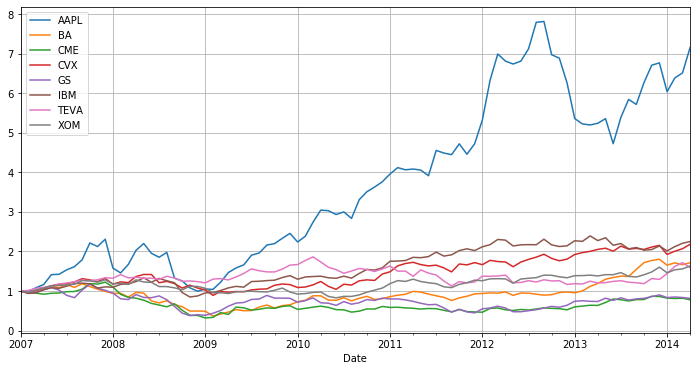

In [74]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12,6),grid=True);

In [75]:
# like cum_gross_returns.plot() but smooth
# twelve points per year only

# Moving averages

In [76]:
# AAPL only

In [77]:
close_px.AAPL

Date
2007-01-03     2.543757
2007-01-04     2.600218
2007-01-05     2.581701
2007-01-08     2.594450
2007-01-09     2.809970
                ...    
2014-05-09    18.595768
2014-05-12    18.827282
2014-05-13    18.856813
2014-05-14    18.860310
2014-05-15    18.699928
Name: AAPL, Length: 1855, dtype: float64

In [78]:
aapl_close = close_px.AAPL

In [79]:
# 30-day moving average

In [80]:
ma_30 = aapl_close.rolling(window=30).mean()
ma_30[:5]

Date
2007-01-03   NaN
2007-01-04   NaN
2007-01-05   NaN
2007-01-08   NaN
2007-01-09   NaN
Name: AAPL, dtype: float64

In [81]:
ma_30[25:32]

Date
2007-02-08         NaN
2007-02-09         NaN
2007-02-12         NaN
2007-02-13         NaN
2007-02-14    2.656769
2007-02-15    2.658196
2007-02-16    2.657356
Name: AAPL, dtype: float64

In [82]:
# 30-day and 90-day moving averages

In [83]:
ma_30 = aapl_close.rolling(window=30).mean()
ma_90 = aapl_close.rolling(window=90).mean()

In [84]:
# Create dataframe with these moving averages (start empty data frame)

In [85]:
df2 = pd.DataFrame()
df2['Price'] = aapl_close
df2['30 days m.a.'] = ma_30
df2['90 days m.a.'] = ma_90

In [86]:
df2.iloc[26:33,]

,Price,30 days m.a.,90 days m.a.
Date,,,
2007-02-09,2.527669,NaN,NaN
2007-02-12,2.576542,NaN,NaN
2007-02-13,2.571076,NaN,NaN
2007-02-14,2.589290,2.656769,NaN
2007-02-15,2.586558,2.658196,NaN
2007-02-16,2.575023,2.657356,NaN
2007-02-20,2.607502,2.658216,NaN


In [87]:
df2.iloc[86:93,]

,Price,30 days m.a.,90 days m.a.
Date,,,
2007-05-08,3.189106,2.893357,NaN
2007-05-09,3.244353,2.904912,NaN
2007-05-10,3.258316,2.919179,NaN
2007-05-11,3.300813,2.934346,2.767993
2007-05-14,3.319633,2.950991,2.776614
2007-05-15,3.263780,2.965025,2.783987
2007-05-16,3.258316,2.978017,2.791505


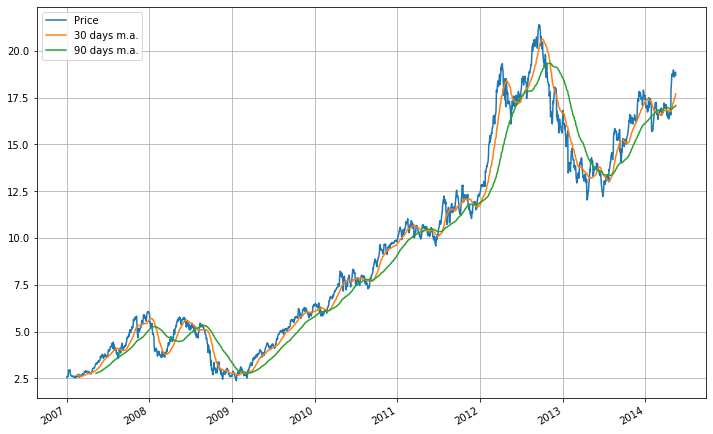

In [88]:
# plot prices and moving averages
df2.plot(figsize=(12,8))
plt.legend(loc='upper left')
plt.xlabel('')
plt.grid()

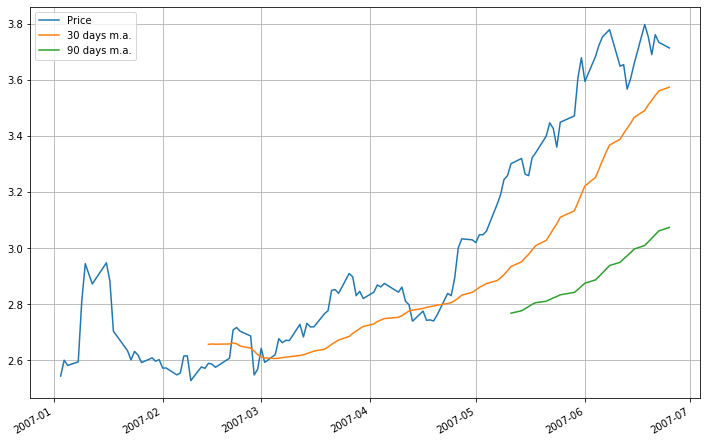

In [89]:
# plot first 120 days
df2.iloc[0:120,].plot(figsize=(12,8))
plt.legend(loc='upper left')
plt.xlabel('')
plt.grid()

In [90]:
# 30-day moving average is closer to prices

In [91]:
# 90-day moving average is more smooth than 30-day m.a.

## Comparison of net_returns across stocks

In [92]:
# Matplotlib scatterplot of IBM vs AAPL net_returns

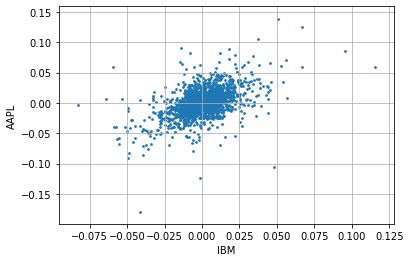

In [93]:
plt.scatter(net_returns['IBM'], net_returns['AAPL'],s=3)
plt.xlabel('IBM')
plt.ylabel('AAPL')
plt.grid()

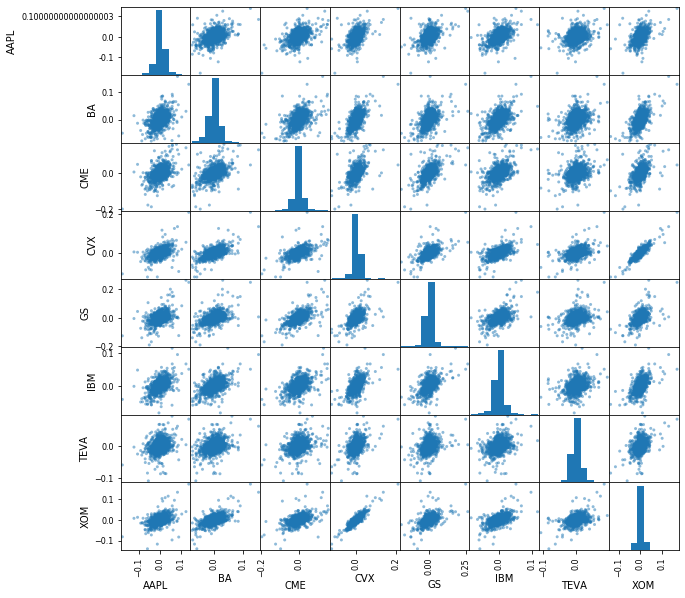

In [94]:
# scatterplot for ALL stocks returns
pd.plotting.scatter_matrix(net_returns, 
                           figsize=(10,10));

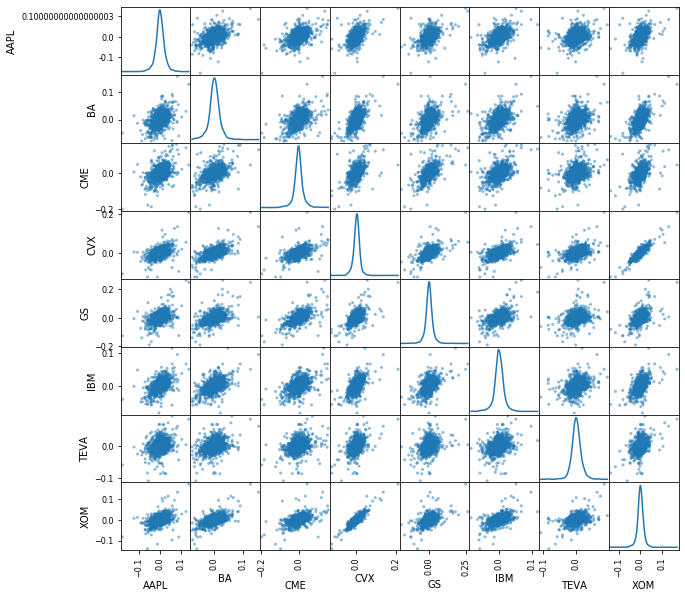

In [94]:
# scatterplot for ALL stocks returns
pd.plotting.scatter_matrix(net_returns, diagonal='kde', 
                           figsize=(10,10));

In [95]:
# or
# from pandas.plotting import scatter_matrix
# scatter_matrix(net_returns, diagonal='kde', figsize=(12,12));

In [96]:
# CVX, XOM highly linearly related

In [97]:
# BA, TEVA not linearly related

## Correlation matrix of net returns

In [99]:
net_returns.shape

(1855, 8)

In [95]:
corrs = net_returns.corr()
corrs

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
AAPL,1.000000,0.423271,0.439085,0.457008,0.443804,0.498449,0.280115,0.417115
BA,0.423271,1.000000,0.473988,0.600928,0.495654,0.521861,0.347606,0.597275
CME,0.439085,0.473988,1.000000,0.519919,0.585881,0.490923,0.323112,0.504936
CVX,0.457008,0.600928,0.519919,1.000000,0.556283,0.578764,0.421735,0.891371
GS,0.443804,0.495654,0.585881,0.556283,1.000000,0.523909,0.314261,0.512294
IBM,0.498449,0.521861,0.490923,0.578764,0.523909,1.000000,0.322244,0.567272
TEVA,0.280115,0.347606,0.323112,0.421735,0.314261,0.322244,1.000000,0.410558
XOM,0.417115,0.597275,0.504936,0.891371,0.512294,0.567272,0.410558,1.000000


In [97]:
type(corrs)

pandas.core.frame.DataFrame

In [96]:
corrs.shape

(8, 8)

In [99]:
# in this set of stocks, all correlations are positive

In [100]:
type(corrs)

pandas.core.frame.DataFrame

In [101]:
mincorr = corrs.min()
mincorr

AAPL    0.280115
BA      0.347606
CME     0.323112
CVX     0.421735
GS      0.314261
IBM     0.322244
TEVA    0.280115
XOM     0.410558
dtype: float64

In [ ]:
# smallest corr includes AAPL but with what other stock?

In [101]:
corrs.values

array([[1.        , 0.42327085, 0.43908421, 0.45700847, 0.44380366,
        0.49844945, 0.28011474, 0.41711527],
       [0.42327085, 1.        , 0.47398789, 0.60092778, 0.4956536 ,
        0.52186129, 0.34760651, 0.59727426],
       [0.43908421, 0.47398789, 1.        , 0.51991991, 0.5858817 ,
        0.49092373, 0.32311218, 0.50493654],
       [0.45700847, 0.60092778, 0.51991991, 1.        , 0.55628251,
        0.5787637 , 0.42173526, 0.89137059],
       [0.44380366, 0.4956536 , 0.5858817 , 0.55628251, 1.        ,
        0.52390845, 0.31426185, 0.51229316],
       [0.49844945, 0.52186129, 0.49092373, 0.5787637 , 0.52390845,
        1.        , 0.32224416, 0.56727192],
       [0.28011474, 0.34760651, 0.32311218, 0.42173526, 0.31426185,
        0.32224416, 1.        , 0.4105582 ],
       [0.41711527, 0.59727426, 0.50493654, 0.89137059, 0.51229316,
        0.56727192, 0.4105582 , 1.        ]])

In [102]:
type(corrs.values)

numpy.ndarray

### find stocks with smallest correlation

In [103]:
mincorr = corrs.values.min()
mincorr

0.28011474121699076

In [104]:
np.where(corrs == mincorr)

(array([0, 6]), array([6, 0]))

In [105]:
# display column names
corrs.columns[0],corrs.columns[6]

('AAPL', 'TEVA')

In [106]:
# smallest corr from TEVA and AAPL

### find stocks with largest correlation

In [107]:
matrix1 = corrs.values

# make diagonal values equal to zero
np.fill_diagonal(matrix1,0.0)
print(np.round(matrix1,3))

[[0.    0.423 0.439 0.457 0.444 0.498 0.28  0.417]
 [0.423 0.    0.474 0.601 0.496 0.522 0.348 0.597]
 [0.439 0.474 0.    0.52  0.586 0.491 0.323 0.505]
 [0.457 0.601 0.52  0.    0.556 0.579 0.422 0.891]
 [0.444 0.496 0.586 0.556 0.    0.524 0.314 0.512]
 [0.498 0.522 0.491 0.579 0.524 0.    0.322 0.567]
 [0.28  0.348 0.323 0.422 0.314 0.322 0.    0.411]
 [0.417 0.597 0.505 0.891 0.512 0.567 0.411 0.   ]]


In [108]:
np.amax(matrix1)

0.8913705933964058

In [109]:
np.where(matrix1 == np.amax(matrix1))

(array([3, 7]), array([7, 3]))

In [110]:
# display column names
corrs.columns[1],corrs.columns[3]

('BA', 'CVX')

# Heatmap

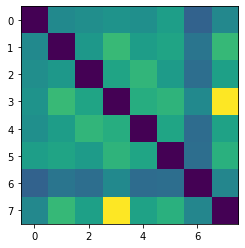

In [111]:
# Correlation matrix as a colored-table
plt.imshow(corrs);

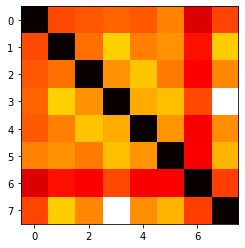

In [112]:
plt.imshow(corrs, cmap='hot');

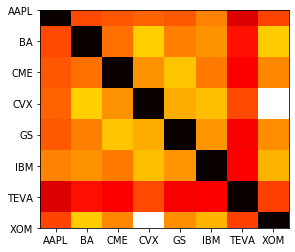

In [113]:
col_names = corrs.columns

plt.imshow(corrs, cmap='hot')
plt.xticks(range(8), col_names)
plt.yticks(range(8), col_names);

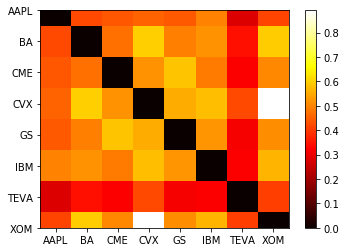

In [114]:
plt.imshow(corrs, cmap='hot')
plt.xticks(range(8), col_names)
plt.yticks(range(8), col_names)
plt.colorbar();

## Portfolio of all stocks

In [115]:
dfstocks = net_returns.copy()

In [116]:
# portfolio daily returns are the average of all others
dfstocks['portfolio'] = dfstocks.mean(axis=1)
dfstocks[:5]

,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM,portfolio
Date,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,0.004038,0.007266,-0.009723,-0.009317,0.010692,0.012156,-0.018756,0.002319
2007-01-05,-0.007122,-0.004245,0.004689,0.003842,0.001006,-0.009052,0.018015,0.007150,0.001785
2007-01-08,0.004938,-0.002355,0.010637,0.012757,0.023511,0.015192,0.020801,-0.008055,0.009678
2007-01-09,0.083070,-0.010569,0.005777,-0.011476,0.001718,0.011830,-0.001825,-0.007708,0.008852


In [117]:
# find the risk of stocks and the portfolio
dfstocks.std()

AAPL         0.022426
BA           0.019597
CME          0.027342
CVX          0.018287
GS           0.028445
IBM          0.014748
TEVA         0.015723
XOM          0.016946
portfolio    0.015183
dtype: float64

In [118]:
# portfolio risk is second smallest